In [1]:
from qiskit import QuantumRegister
from qiskit import ClassicalRegister
from qiskit import QuantumCircuit
from qiskit import execute
from qiskit import Aer

from qiskit.visualization import plot_bloch_multivector

from qiskit.extensions import Initialize

from qiskit_textbook.tools import random_state

%matplotlib inline

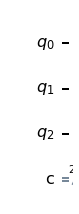

In [2]:
qr = QuantumRegister(3, name='q')
cr = ClassicalRegister(2, name='c')
circ = QuantumCircuit(qr, cr)

circ.draw(output='mpl')

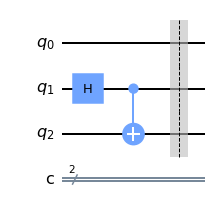

In [3]:
circ.h(1)
circ.cx(1, 2)
circ.barrier()

circ.draw(output='mpl')

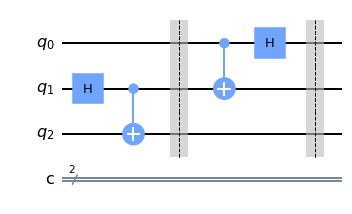

In [4]:
circ.cx(0, 1)
circ.h(0)
circ.barrier()

circ.draw(output='mpl')

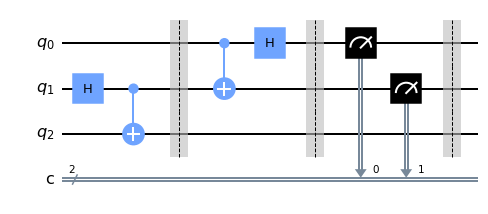

In [5]:
circ.measure([0, 1], [0, 1])
circ.barrier()

circ.draw(output='mpl')

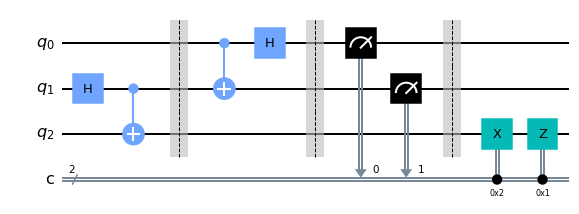

In [6]:
circ.x(2).c_if(cr, 2)
circ.z(2).c_if(cr, 1)

circ.draw(output='mpl')

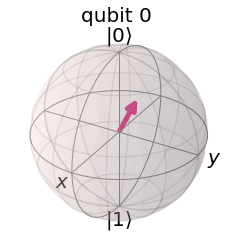

In [7]:
psi = random_state(1)
plot_bloch_multivector(psi)

In [8]:
init_gate = Initialize(psi)
init_gate.label = 'init'

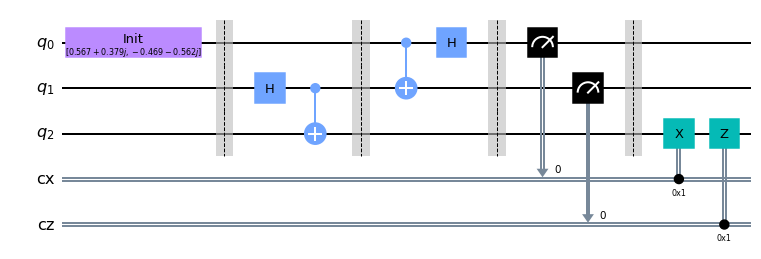

In [9]:
qr = QuantumRegister(3, name='q')
crx = ClassicalRegister(1, name='cx')
crz = ClassicalRegister(1, name='cz')
circ = QuantumCircuit(qr, crx, crz)

circ.append(init_gate, [0])
circ.barrier()

circ.h(1)
circ.cx(1, 2)
circ.barrier()

circ.cx(0, 1)
circ.h(0)
circ.barrier()

circ.measure([0, 1], [0, 1])
circ.barrier()

circ.x(2).c_if(crx, 1)
circ.z(2).c_if(crz, 1)

circ.draw(output='mpl')

In [10]:
backend = Aer.get_backend('statevector_simulator')
result = execute(circ, backend=backend).result().get_statevector()

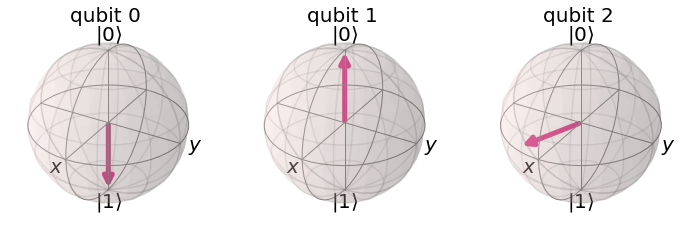

In [11]:
plot_bloch_multivector(result)

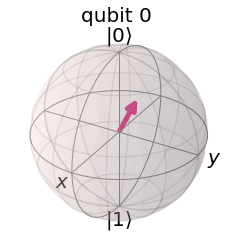

In [12]:
plot_bloch_multivector(psi)

In [13]:
import qiskit
print(qiskit.__qiskit_version__)

{'qiskit-terra': '0.16.0', 'qiskit-aer': '0.7.0', 'qiskit-ignis': '0.5.0', 'qiskit-ibmq-provider': '0.11.0', 'qiskit-aqua': '0.8.0', 'qiskit': '0.23.0'}
